In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [20]:
data = pd.read_csv('all_stocks_5yr.csv')
print(data.shape)
print(data.sample(10))

(460776, 7)
              date     open      high       low    close    volume  Name
74512   2014-08-18   74.770   75.3700   74.6200   75.210   1070421   BAX
402983  2015-01-27   45.220   45.9400   45.0600   45.600    499328  NCLH
138886  2015-09-29   46.280   46.6929   45.7200   46.570   7977997   COP
344456  2016-06-13  146.120  146.7400  144.8800  144.970    429231   LLL
205587  2017-07-27   60.810   61.0900   60.4000   60.710   2204710    ES
210337  2015-04-06   70.120   70.3150   69.6257   69.925   1789084    EW
415010  2017-10-30  296.870  298.2900  295.2000  296.370    469498   NOC
354435  2016-01-29   36.172   37.6700   35.5100   37.620   9554523   LUV
353507  2017-05-23   24.730   24.8497   24.4900   24.790    825042   LUK
319084  2013-04-16   48.430   48.5200   47.5900   48.490  23865338   JPM


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65342 entries, 0 to 65341
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    65342 non-null  object 
 1   open    65342 non-null  float64
 2   high    65342 non-null  float64
 3   low     65342 non-null  float64
 4   close   65341 non-null  float64
 5   volume  65341 non-null  float64
 6   Name    65341 non-null  object 
dtypes: float64(5), object(2)
memory usage: 3.5+ MB


In [4]:
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65342 entries, 0 to 65341
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    65342 non-null  datetime64[ns]
 1   open    65342 non-null  float64       
 2   high    65342 non-null  float64       
 3   low     65342 non-null  float64       
 4   close   65341 non-null  float64       
 5   volume  65341 non-null  float64       
 6   Name    65341 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 3.5+ MB


In [21]:


companies = ['AAPL', 'APA', 'AMZN',  'AET', 'AJG', 'ALK', 'LLL', 'JPM', 'NCLH']


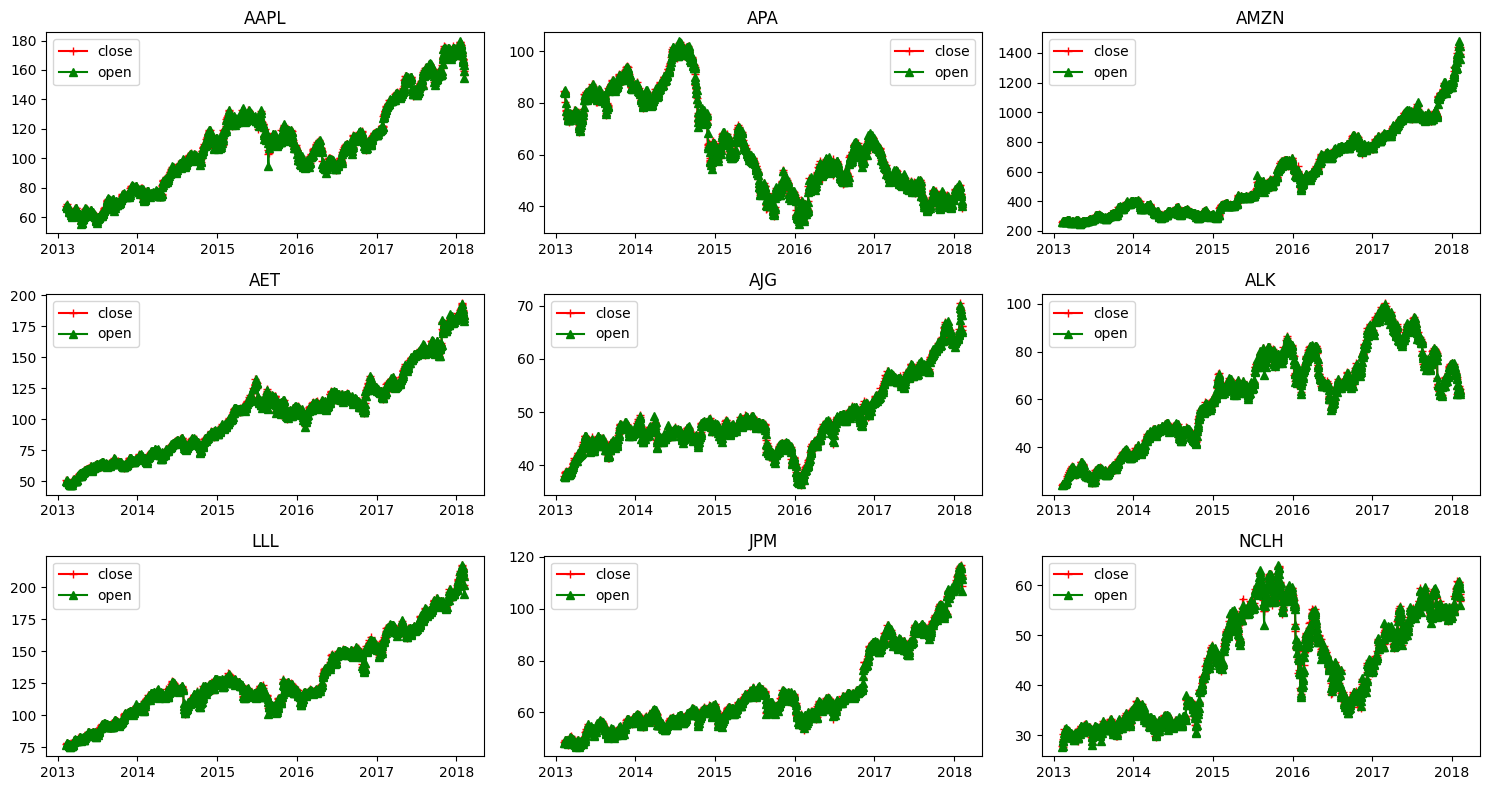

In [22]:
data['date'] = pd.to_datetime(data['date'])
# date vs open
# date vs close
plt.figure(figsize=(15, 8))
for index, company in enumerate(companies, 1):
    plt.subplot(3, 3, index)
    c = data[data['Name'] == company]
    plt.plot(c['date'], c['close'], c="r", label="close", marker="+")
    plt.plot(c['date'], c['open'], c="g", label="open", marker="^")
    plt.title(company)
    plt.legend()
    plt.tight_layout()

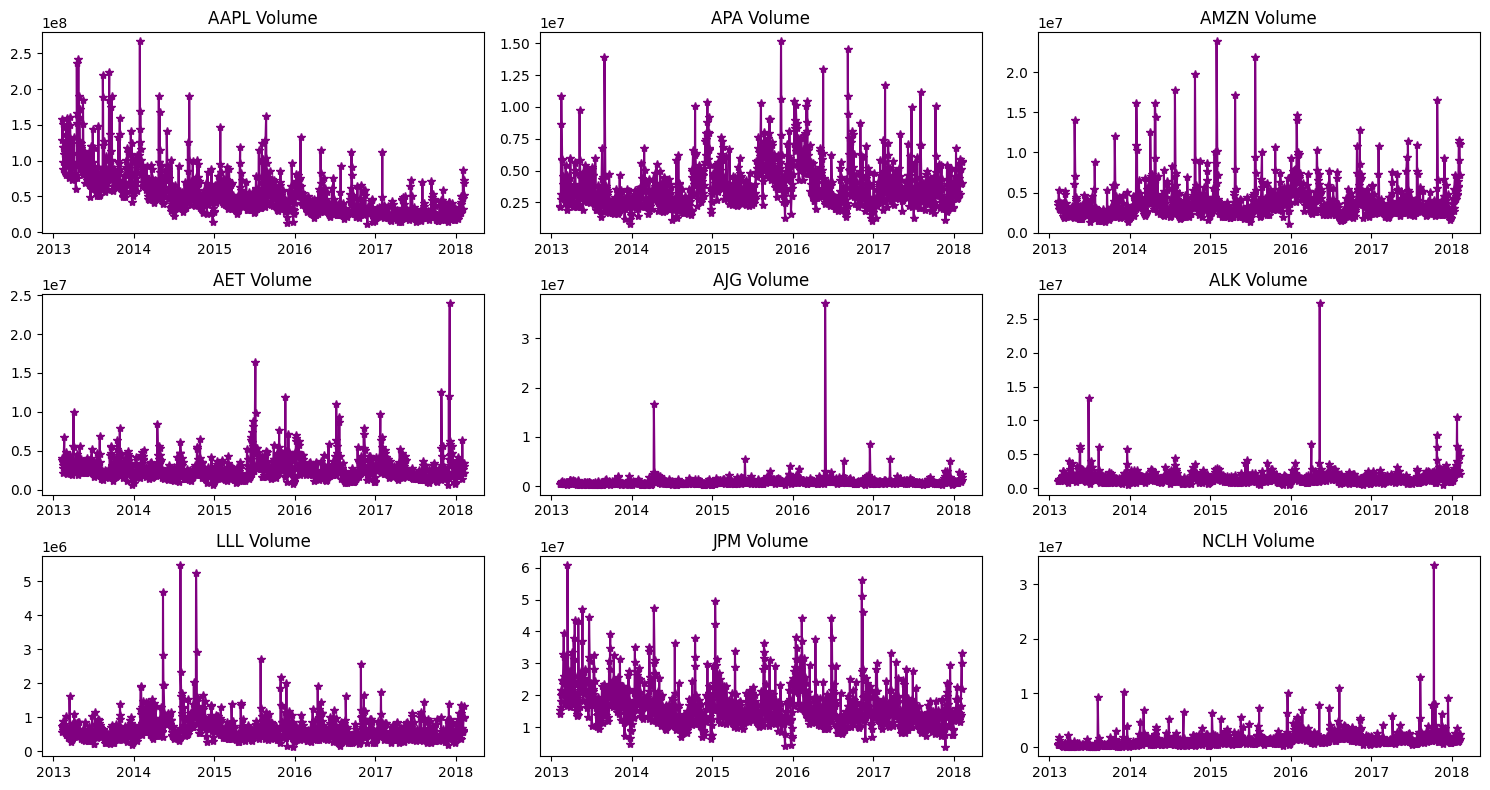

In [23]:
plt.figure(figsize=(15, 8))
for index, company in enumerate(companies, 1):
    plt.subplot(3, 3, index)
    c = data[data['Name'] == company]
    plt.plot(c['date'], c['volume'], c='purple', marker='*')
    plt.title(f"{company} Volume")
    plt.tight_layout()

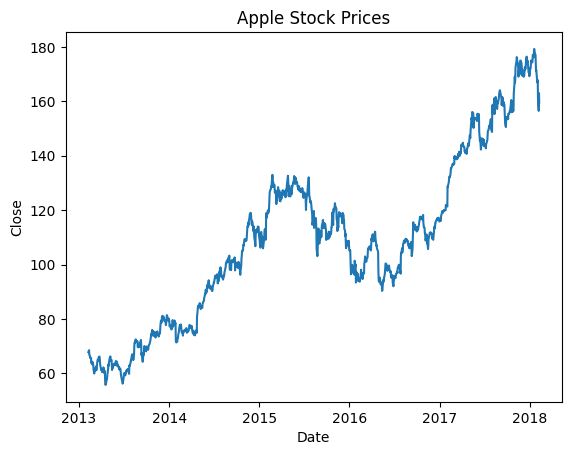

In [24]:
apple = data[data['Name'] == 'AAPL']
prediction_range = apple.loc[(apple['date'] > datetime(2013,1,1))
 & (apple['date']<datetime(2018,1,1))]
plt.plot(apple['date'],apple['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Apple Stock Prices")
plt.show()

In [25]:
close_data = apple.filter(['close'])
dataset = close_data.values
training = int(np.ceil(len(dataset) * .95))
print(training)

1197


In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training), :]
# prepare feature and labels
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [27]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
                            return_sequences=True,
                            input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))


<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x79dfcf6013f0>>

In [28]:
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x79dfcf6013f0>>

In [29]:
model.compile(optimizer='adam',
              loss='mean_squared_error')
history = model.fit(x_train,
                    y_train,
                    epochs=20)

Epoch 1/20
36/36 [==============================] - 7s 89ms/step - loss: 0.0258
Epoch 2/20
36/36 [==============================] - 2s 62ms/step - loss: 0.0088
Epoch 3/20
36/36 [==============================] - 2s 59ms/step - loss: 0.0086
Epoch 4/20
36/36 [==============================] - 2s 63ms/step - loss: 0.0080
Epoch 5/20
36/36 [==============================] - 2s 60ms/step - loss: 0.0077
Epoch 6/20
36/36 [==============================] - 3s 81ms/step - loss: 0.0071
Epoch 7/20
36/36 [==============================] - 2s 68ms/step - loss: 0.0065
Epoch 8/20
36/36 [==============================] - 2s 60ms/step - loss: 0.0087
Epoch 9/20
36/36 [==============================] - 2s 58ms/step - loss: 0.0060
Epoch 10/20
36/36 [==============================] - 2s 59ms/step - loss: 0.0064
Epoch 11/20
36/36 [==============================] - 2s 63ms/step - loss: 0.0064
Epoch 12/20
36/36 [==============================] - 3s 81ms/step - loss: 0.0053
Epoch 13/20
36/36 [==================

In [34]:
print(data.columns)


Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')


In [30]:
test_data = scaled_data[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# predict the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# evaluation metrics
mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))

2/2 [==============================] - 1s 23ms/step
MSE 27.357175368284743
RMSE 5.230408719047178


In [44]:
test[['close','Predictions']]

,close,Predictions
2456,176.24,170.829514
2457,175.88,172.500519
2458,174.67,173.967865
2459,173.97,175.088440
2460,171.34,175.861465
...,...,...
2513,167.78,174.929932
2514,160.50,173.882660
2515,156.49,172.357300
2516,163.03,170.377716


from matplotlib import pyplot as plt
_df_0['close'].plot(kind='hist', bins=20, title='close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Predictions'].plot(kind='hist', bins=20, title='Predictions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='close', y='Predictions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['close'].plot(kind='line', figsize=(8, 4), title='close')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Predictions'].plot(kind='line', figsize=(8, 4), title='Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['close'].plot(kind='hist', bins=20, title='close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Predictions'].plot(kind='hist', bins=20, title='Predictions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='index', y='close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='close', y='Predictions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('close')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Predictions']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Predictions')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_13['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['close'].plot(kind='line', figsize=(8, 4), title='close')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Predictions'].plot(kind='line', figsize=(8, 4), title='Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)

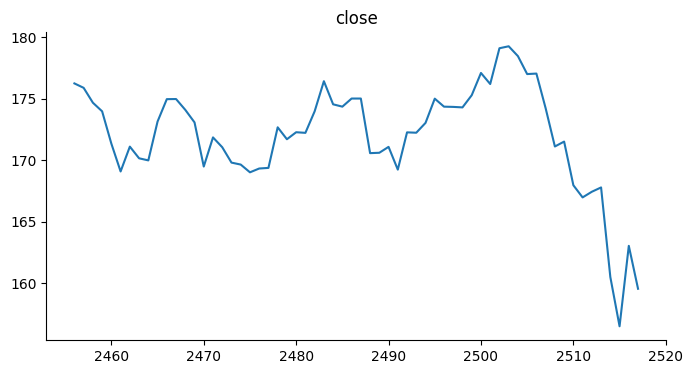

In [56]:
from matplotlib import pyplot as plt
_df_3['close'].plot(kind='line', figsize=(8, 4), title='close')
plt.gca().spines[['top', 'right']].set_visible(False)

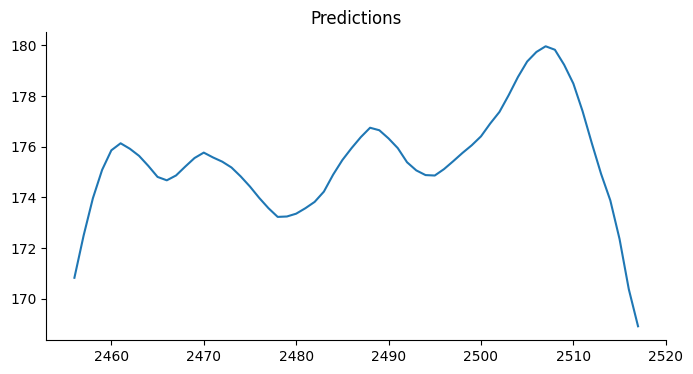

In [57]:
from matplotlib import pyplot as plt
_df_4['Predictions'].plot(kind='line', figsize=(8, 4), title='Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)